<a href="https://colab.research.google.com/github/Bzitsman/data-analytics-profolio/blob/main/Copy_of_Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




# Import necessary packages for Data Analysis, Wrangling, Visualization, and Machine Learning 

I am not sure which model I will end up with at this point so importing possibly more packages then nessacary 

In [33]:
#Step 1
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# machine visualization
import matplotlib.pyplot as plt


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

# Upload the Titanic data

The code in the code cell only works for google colad. If you are using another workbook try using the code in the text box.



```
import pandas as pd

df = pd.read_csv (r'Path where the CSV file is stored\File name.csv')
print (df)
```


In [ ]:
#Step 2 Import data and name it titanic
from google.colab import files
titanic = files.upload()


# Create a Pandas DataFrame from the CSV file

In [35]:
titanic = pd.read_csv('/content/Titanic.csv')

#print the first 5 lines of the dataframe 

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyze the Data to see what is in the dataset. 
I will use the following commands to look at the dataset


*   Column values
*   Info
*   Describe 

In [36]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [37]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Running the info command we see that we are missing data in some of the columns. Also, some of the columns are in float64 and we will need to change that to int, as well as change male and female genders to int.

In [38]:
#distribution of numerical feature value
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.712885,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.529273,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
#distribution of categorical feature
titanic.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Taking a closer look at some features

The code below looks at the survival rate of each class. You would have a 63% of survival as a first-class passenger.

In [40]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The code below looks at the survival rate of male and female passengers. Female passengers had a 74% chance of survival vs male passengers who had a 19% rate of survival.

In [41]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#I am going to do step 4 before step 3.

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [42]:
#Step 4

#fill in the null values in the data
titanic.fillna(method='ffill', inplace=True)

In [43]:
#Convert Age from a float to an int value
titanic["Age"]= titanic['Age'].astype(int)

In [44]:
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Create a new column called "Gender" instead of "Sex" assign male as 0 and female to 1. Convert Gender from (float) to (int), and drop the "Sex" Column

In [45]:
titanic.loc[titanic["Sex"]== "male", "Gender"] = 0
titanic.loc[titanic["Sex"]== "female", "Gender"] = 1

titanic["Gender"] = titanic["Gender"].astype(int)


titanic = titanic.drop(["Sex"], axis=1)

In [46]:
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket'
 'Fare' 'Cabin' 'Embarked' 'Gender']


In [47]:
#drop columns ticket, cabin, name, and passenger Id from dateframe
print("before", titanic.shape)

titanic = titanic.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

print("after", titanic.shape)

before (891, 12)
after (891, 8)


In [48]:
print(titanic.columns.values)

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Gender']


In [49]:
(titanic.head(5))

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22,1,0,7.2500,S,0
1,1,1,38,1,0,71.2833,C,1
2,1,3,26,0,0,7.9250,S,1
3,1,1,35,1,0,53.1000,S,1
4,0,3,35,0,0,8.0500,S,0


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.


**I am dropping columns that I feel will not help with model and could cuase overfitting**

In [50]:
#Step 3
# seting the y and X values. Dropping Embarked, Survived and Fare
y = titanic["Survived"]
X= titanic.drop(["Embarked", "Survived", "Fare"], axis=1)

# Split the data into a training/validation dataset and a test dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
print(X_train.shape, X_test.shape)

(668, 5) (223, 5)


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



# For my basline Model I am using Logistic regression 

**The following code block is used for building a pipeline that will impute and standardize the data and fit a logistic regression model**

In [52]:
# Step 5
pipe = Pipeline([
('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('log_reg', LogisticRegression(random_state=0))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [53]:
#Step 6
scores = cross_val_score(pipe, X_train, y_train, cv=10)
print(scores.mean())
print(scores.std())

0.7874717322478516
0.07376264528140776


I do not think my model is over fitting and is running fairly well with a mean of 78%

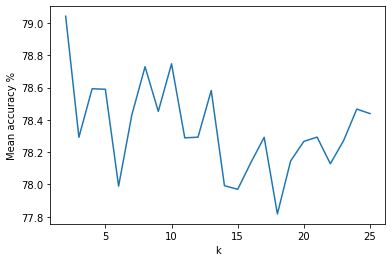

In [54]:
k = list(range(2,26))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

In [55]:
test_accuracy = pipe.score(X_test, y_test)

print('The testing accuracy is', test_accuracy)

The testing accuracy is 0.8026905829596412


My test score is higher then my taining data.

# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

Now I will try a model with Gaussina Naive Bayes

In [56]:
#Step 7

nb = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('gausian', GaussianNB())])
nb.fit(X_train, y_train)

print(X_train.shape, y_train.shape)

(668, 5) (668,)


In [57]:
nb_scores = cross_val_score(nb, X_train, y_train, cv=10)

print(nb_scores.mean())
print(nb_scores.std())

0.7634328358208956
0.0707941151560634


In [58]:
test_accuracy = nb.score(X_test, y_test)

print('The testing accuracy is', test_accuracy)

The testing accuracy is 0.7668161434977578


I will try a Decision Tree Model to see if the result will improve.

In [59]:
tree1 = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', DecisionTreeClassifier(criterion='entropy', random_state=42))])

tree1.fit(X_train, y_train)

print(X_train.shape, y_train.shape)

(668, 5) (668,)


In [60]:
tree1_scores = cross_val_score(tree1, X_train, y_train, cv=10)

print(tree1_scores.mean())
print(tree1_scores.std())

0.7666214382632294
0.055861381186609355


In [61]:
test_accuracy = tree1.score(X_test, y_test)

print('The testing accuracy is', test_accuracy)

The testing accuracy is 0.7713004484304933


 Random Forest Classifier with the Default Values of the Hyperparameters

In [62]:
forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)

print(scores.mean())

0.7875169606512891


In [63]:
test_accuracy = forest.score(X_test, y_test)

print('The testing accuracy is', test_accuracy)

The testing accuracy is 0.820627802690583


# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [64]:
# Step 8
test_accuracy = forest.score(X_test, y_test)

print('The testing accuracy for Forest Model is', test_accuracy)

test_accuracy = tree1.score(X_test, y_test)

print('The testing accuracy for the Tree Model is', test_accuracy)

test_accuracy = nb.score(X_test, y_test)

print('The testing accuracy for NB Model is', test_accuracy)

test_accuracy = pipe.score(X_test, y_test)

print('The testing accuracy for Logistic Regression Model is', test_accuracy)

The testing accuracy for Forest Model is 0.820627802690583
The testing accuracy for the Tree Model is 0.7713004484304933
The testing accuracy for NB Model is 0.7668161434977578
The testing accuracy for Logistic Regression Model is 0.8026905829596412


#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

I looked at the feauters and decided ones that would not have an effect on the model such as where they boarded the ship and the cost of there ticket.

I filled in the missing data and also changed male and female to 0 and 1. I also convert gender and age from float to interger.

For my baseling model I used a Logitical Regression Model. I thought this would be a good fit for the type of data we had. I used mean and standard deviation scores to review the models. My Logictical Regression training data had a mean score of 78% and the test data had a mean score of 80%.

The other models I chose were Gaussina Naive Bayes, Decision Tree Classifier, and Random Forest.

*   Gaussina Naive Bayes was picked because it is a simple classification technique, but has high functionality.
*    Decision Tree Classifier was picked becuase it is good with regression training 
*   Random Forst was picked becuase the decision tree model had a strong mean and I thought a random forst might be better as It builds decision trees on different samples and takes their average in case of regression


The best model using the test data was the Random Forest and in a close 2nd place was my baseline model Logicstic Regression
```
The testing accuracy for Forest Model is 0.820627802690583
The testing accuracy for the Tree Model is 0.7713004484304933
The testing accuracy for NB Model is 0.7668161434977578
The testing accuracy for Logistic Regression Model is 0.8026905829596412
```

